In [1]:
import numpy as np
import matplotlib.pyplot as plt

# I Logistic Regression

## 01 Sigmod function (logistic function)

### (a) Formula for sigmod function

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model. 

In [2]:
def sigmod(z):
    return 1 / (1 + np.exp(-z))

**Test sigmod function**

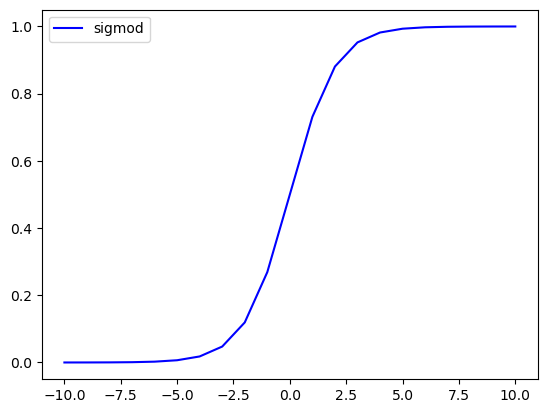

In [3]:
z_test = np.arange(-10, 11)
plt.plot(z_test, sigmod(z_test), color = "blue", label = "sigmod")
plt.legend()
plt.show()

## 02 Logistic Regression Formula

### (a) Sigmod Function

A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$
  
When $z$ is larger than 0, sigmod function of $z$ is larger than 0.5. Therefore, we can consider $z = 0$ as a **descision boundary**.

### (b) Logistic Loss Function

Logistic Regression uses a **loss function** more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Loss** is a measure of the difference of a single example to its target value while the  
>**Cost** is a measure of the losses over the training set

This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

In [4]:
def predict_y(w, b, x):
#     return w * x + b
    return np.dot(x, w) + b

In [5]:
def compute_loss(w, b, x, y):
    f_wb = sigmod(predict_y(w, b, x))
    return (-y) * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)

**Test compute_loss function**

In [6]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

w_tmp = np.array([1,1])
b_tmp = -3

In [7]:
compute_loss(w_tmp, b_tmp, X_train, y_train)

array([0.31326169, 0.31326169, 0.31326169, 0.47407698, 0.31326169,
       0.47407698])

### (c) Logistic Cost Function

Here combines the losses to form the cost:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

In [8]:
def compute_cost(w, b, x, y):
    return np.sum(compute_loss(w, b, x, y)) / x.shape[0]

**Test cost function**

In [9]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

w_tmp = np.array([1,1])
b_tmp = -3

In [10]:
compute_cost(w_tmp, b_tmp, X_train, y_train)

0.36686678640551745

### (d) Logistic Gradient Descent

#### (d.1) Compute  $\frac{\partial (w, b)}{\partial w}$, $\frac{\partial (w, b)}{\partial b}$

Notice that when computing gradient descent for logistic regression, $f_{w,b}(x)$ is different from linear regression!

In [11]:
def compute_gradient_logistic(w, b, x, y):
    dj_dw = 0
    for i in range(X_train.shape[0]):
        f_wb_i = sigmod(predict_y(w, b, x[i]))
        dj_dw_i = (f_wb_i - y[i]) * x[i] / x.shape[0]
        dj_dw += dj_dw_i
        
    dj_db = np.sum(sigmod(predict_y(w, b, x)) - y) / x.shape[0]
    
    return dj_dw, dj_db

**Test gradient descent computation function**

In [12]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
compute_gradient_logistic(w_tmp, b_tmp, X_tmp, y_tmp)

(array([0.49833339, 0.49883943]), 0.49861806546328574)

#### (d.2) Gradient Descent

In [13]:
def gradient_descent(w, b, x, y, alpha, num_iters):
    j_history = [] # history values of cost function
    w_history = [] # history values of w
    b_history = [] # history values of b
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(w, b, x, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost_n = compute_cost(w, b, x, y)
        
        if (i < 100000):
            j_history.append(cost_n)
            w_history.append(w)
            b_history.append(b)
            
        if (i % 1000 == 0):
            print(f"Iteration {i:4}: Cost: {cost_n:0.4e} - w: {w} - b: {b}")
    return w, b, j_history, w_history, b_history

**Test logistic gradient descent**

In [14]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_final, b_final, J_hist, w_hist, b_hist = gradient_descent(w_tmp, b_tmp, X_train, y_train, alph, iters)
print(f"\nupdated parameters: w:{w_final}, b:{b_final}")

Iteration    0: Cost: 6.8461e-01 - w: [0.025      0.01666667] - b: 0.0
Iteration 1000: Cost: 1.5910e-01 - w: [2.30572624 2.07740353] - b: -5.9109933019066
Iteration 2000: Cost: 8.4601e-02 - w: [3.15508984 2.94023038] - b: -8.311492289992747
Iteration 3000: Cost: 5.7053e-02 - w: [3.68092411 3.47097047] - b: -9.782304238535811
Iteration 4000: Cost: 4.2908e-02 - w: [4.06024975 3.8527842 ] - b: -10.838640780957707
Iteration 5000: Cost: 3.4338e-02 - w: [4.35647898 4.15050189] - b: -11.66153788565381
Iteration 6000: Cost: 2.8604e-02 - w: [4.59929949 4.39430614] - b: -12.334999960928219
Iteration 7000: Cost: 2.4502e-02 - w: [4.80494417 4.6006459 ] - b: -12.904720255835343
Iteration 8000: Cost: 2.1424e-02 - w: [4.98324047 4.77945746] - b: -13.398265876886166
Iteration 9000: Cost: 1.9030e-02 - w: [5.14058319 4.93719618] - b: -13.833530467558626

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


### (e) Descision Boundary

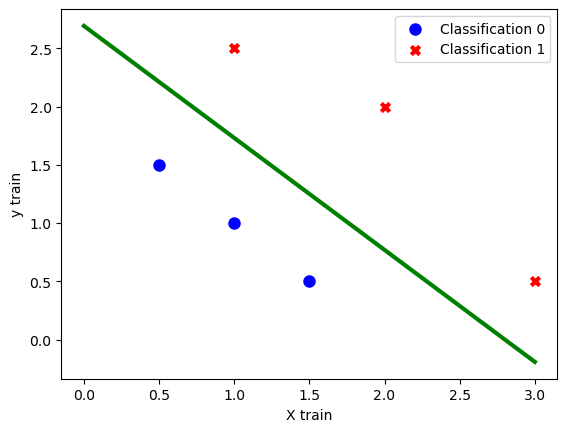

In [25]:
# Seperate X_tmp according to y_tmp
c0 = X_tmp[np.where(y_tmp == 0)]
c1 = X_tmp[np.where(y_tmp == 1)]

# Get coordinations for classification 1
xaxis_0 = c0[:, 0]
yaxis_0 = c0[:, 1]

# Get coordinations for classification 2
xaxis_1 = c1[:, 0]
yaxis_1 = c1[:, 1]

# Draw instance points on the plot
plt.scatter(xaxis_0, yaxis_0, color = 'blue', marker = 'o', label = 'Classification 0', linewidths = 3)
plt.scatter(xaxis_1, yaxis_1, color = 'red', marker = 'x', label = 'Classification 1', linewidths = 3)

# Draw descision boundary
x = np.arange(0., 3.5, .5)
y = (-b_final - w_final[1] * x) / w_final[0]
plt.plot(x, y, color = 'green', linewidth = 3)

plt.xlabel('X train')
plt.ylabel('y train')

plt.legend()
plt.show()